### Single layer perceptron

In [ ]:
! pip install tensorflow

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

#### The MNIST database ( Modified National Institute of Standards and Technology database ) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.

In [3]:
print(len(x_train))
print(len(x_test))   #image dataset 1 folder images ,next folder annotattions

60000
10000


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

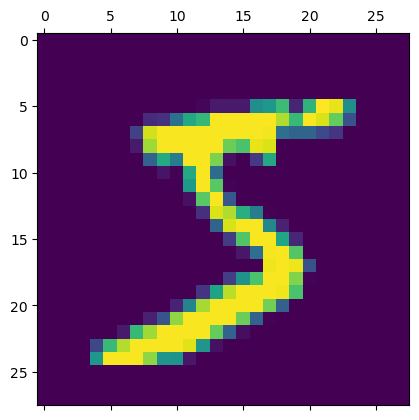

In [4]:
x_train[0].shape
print(x_train[0])
plt.matshow(x_train[0])   # for showing image

In [5]:
# normalzing the dataset
x_train=x_train/255
x_test=x_test/255

# flattening the dataset in order to compute for model building
x_train_flatten=x_train.reshape(len(x_train),28*28)
x_test_flatten=x_test.reshape(len(x_test),28*28) # height * width

In [ ]:
# label encoding to one hot encoder same as dummy encoding : in which class it is present it is 1 and other 0

#### one-hot encoding is a process of converting categorical data such as class labels into a binary matrix (1s and 0s).when using categorical cross entropy,the largest labels need to be in the same shape as the model output.a one-hot encoded format, for example : if an image represents the digit 3 the corresponding label should be [0,0,0,1,0,0,0,0,0]

In [6]:
from tensorflow.keras.utils import to_categorical

#one-hot encode the labels
y_train_one_hot=to_categorical(y_train,10)
y_test_one_hot=to_categorical(y_test,10)

In [7]:
# building a neural network with single layer perceptron
# here we can observe as the model is a single layer perceptron that only one layer that serves as both the input and output layer. there is no presence of the hidden layers
# because all inputs are densily connected to all outputs these layers are called Dense layers

model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),
                      activation='sigmoid')]) # pixels 28*28
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  #multiclass clssification
    metrics=['accuracy'])

model.fit(x_train_flatten,y_train_one_hot,epochs=5)



Epoch 1/5


1875/1875 [==============================] - 3s 1ms/step - loss: 0.4772 - accuracy: 0.8734
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3039 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2832 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2727 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2665 - accuracy: 0.9254


In [8]:

# evaluate the model on test data
test_loss,test_accuracy=model.evaluate(x_test_flatten,y_test_one_hot)
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 1ms/step - loss: 0.2662 - accuracy: 0.9258
Test accuracy: 0.9258000254631042


313/313 [==============================] - 0s 1ms/step


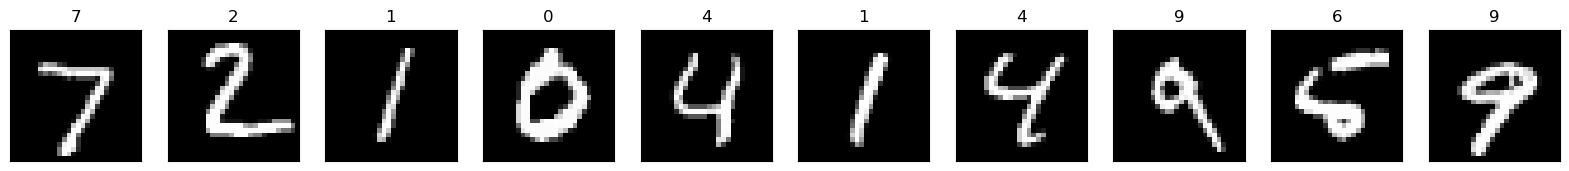

In [9]:
# making predictions using our trained model
predictions=model.predict(x_test_flatten)
predictions=np.argmax(predictions,axis=1) # each input which class ,the highest probability

#display some predictions on test data
fig,axes=plt.subplots(ncols=10,sharex=False,sharey=True,figsize=(20,4))
for i in range(10):
    axes[i].set_title(predictions[i])
    axes[i].imshow(x_test[i],cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()